## Libraries

In [1]:
!pip install MFDFA

In [ ]:
!pip install --force-reinstall git+https://github.com/rsautter/Chi

  Cloning https://github.com/rsautter/Chi-Space to /tmp/pip-req-build-6iga0byf
  Running command git clone -q https://github.com/rsautter/Chi-Space /tmp/pip-req-build-6iga0byf
  Resolved https://github.com/rsautter/Chi-Space to commit 97b22f72a99f3958116506b083faba21f0a86852
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for Chi-Space: filename=Chi_Space-0.2-py3-none-any.whl size=11482 sha256=4f10f54c6d4717a7f071fb7e55b6a2b43df42014b5fa0e4030ddf99585dc93fa
  Stored in directory: /tmp/pip-ephem-wheel-cache-l5bkh5_a/wheels/c4/8c/05/3d35baa21a3b6557cae4f9e83f29147447c92bd652842488a0
Successfully built Chi-Space
  Attempting uninstall: Chi-Space
    Found existing installation: Chi-Space 0.2
    Uninstalling Chi-Space-0.2:
      Successfully uninstalled Chi-Space-0.2


In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D
import chi
from scipy import stats

## Downloading Real Data

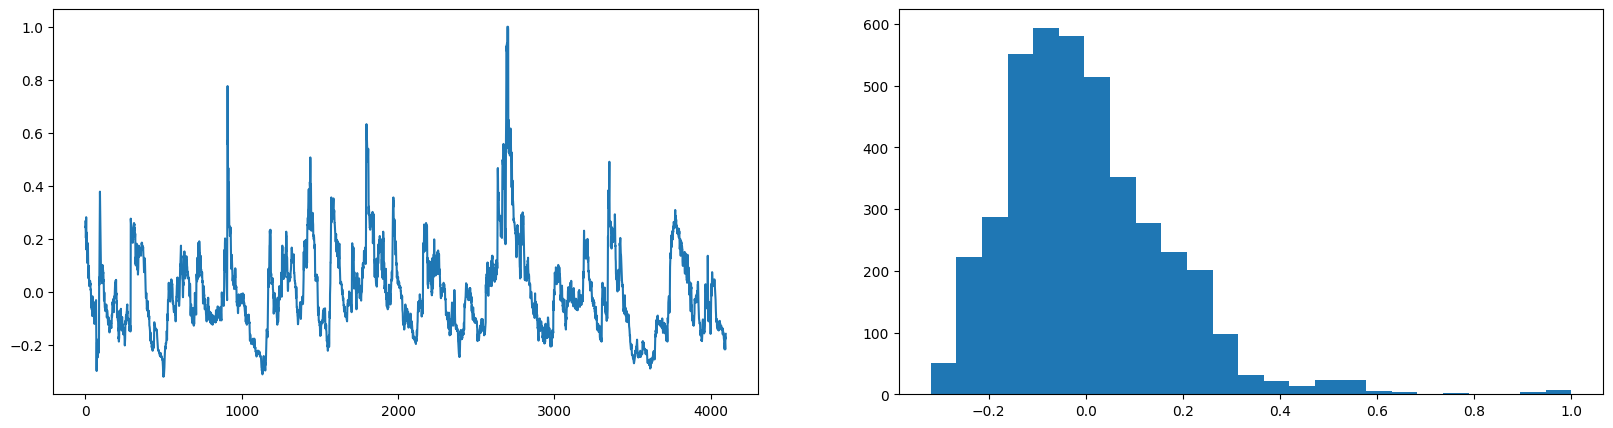

In [4]:
sw4096 = chi.get_SolarWind()
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(sw4096)
plt.subplot(1,2,2)
plt.hist(sw4096,bins=25)
plt.show()

0.9332529647314404


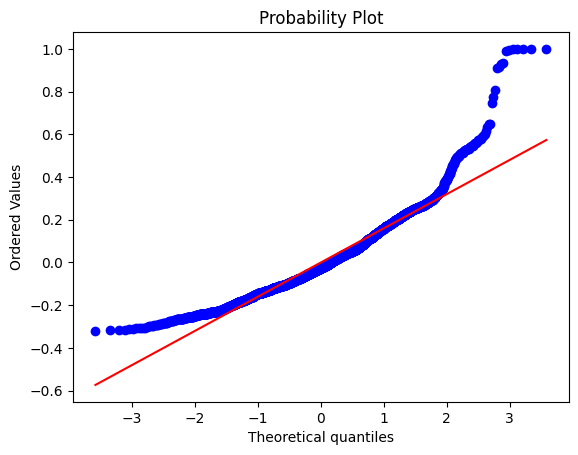

In [5]:
ax = plt.subplot()
(quantiles, ordered_values), (slope, clin, sCoefficientDetermination) =  stats.probplot(sw4096,plot=ax)
print(sCoefficientDetermination**2)
plt.show()

In [6]:
swc = chi.chiSpace(sw4096)

In [7]:
swc

{'GQQ': np.float64(0.06674703526855896), 'LDA': np.float64(0.8791805334751339)}

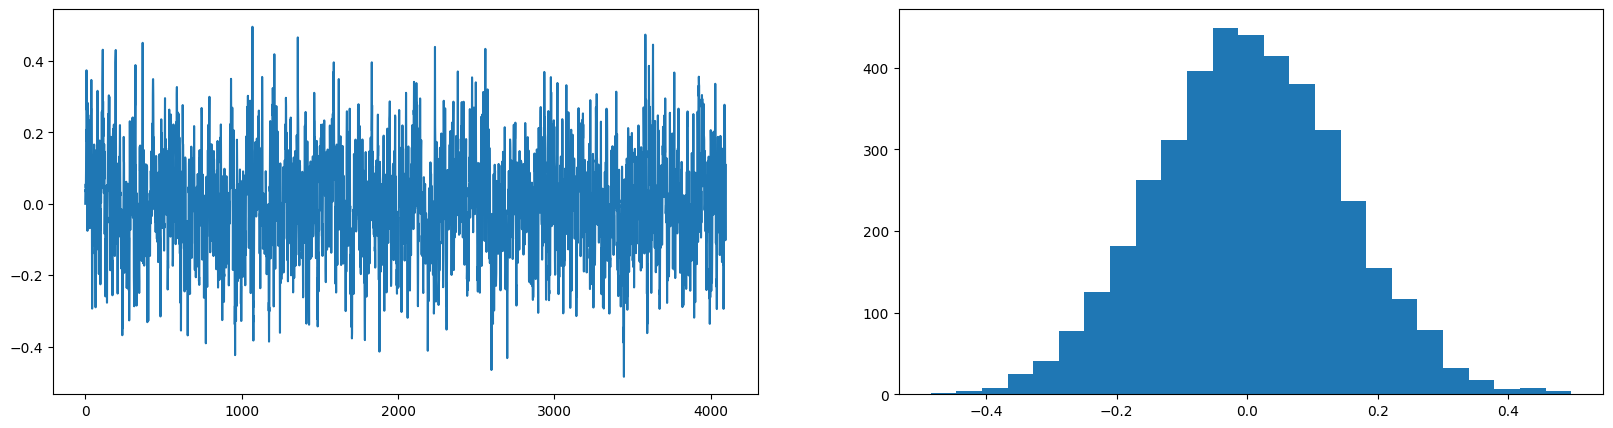

In [8]:
sw4096_s = chi.get_SurrogateSolarWind()
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(sw4096_s)
plt.subplot(1,2,2)
plt.hist(sw4096_s,bins=25)
plt.show()

0.9997351271589228


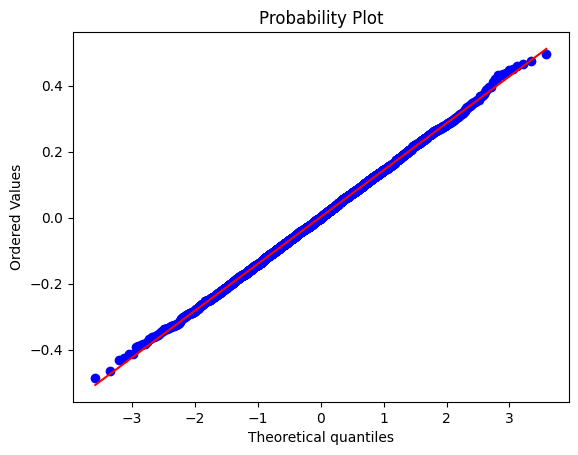

In [9]:
ax = plt.subplot()
(quantiles, ordered_values), (slope, clin, sCoefficientDetermination) =  stats.probplot(sw4096_s,plot=ax)
print(sCoefficientDetermination**2)
plt.show()

In [10]:
swc_s = chi.chiSpace(sw4096_s)

In [11]:
swc_s

{'GQQ': np.float64(0.0002648728410770129),
 'LDA': np.float64(0.48848738624212906)}

In [2]:
symh = chi.get_SYMH()["SYMH"].values

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(symh)
plt.subplot(1,2,2)
plt.hist(symh,bins=25)
plt.show()

URLError: <urlopen error [Errno -2] Name or service not known>

In [13]:
symh_chi = chi.chiSpace(symh)

In [14]:
symh_chi

{'GQQ': np.float64(0.2686863047524476), 'LDA': np.float64(0.7936033748914906)}

0.7313136952475509


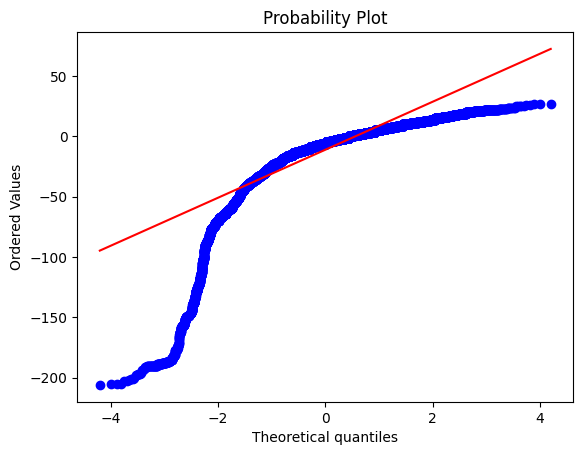

In [15]:
plt.figure()
ax = plt.subplot()
(quantiles, ordered_values), (slope, clin, sCoefficientDetermination) =  stats.probplot(symh,plot=ax)
print(sCoefficientDetermination**2)
plt.show()

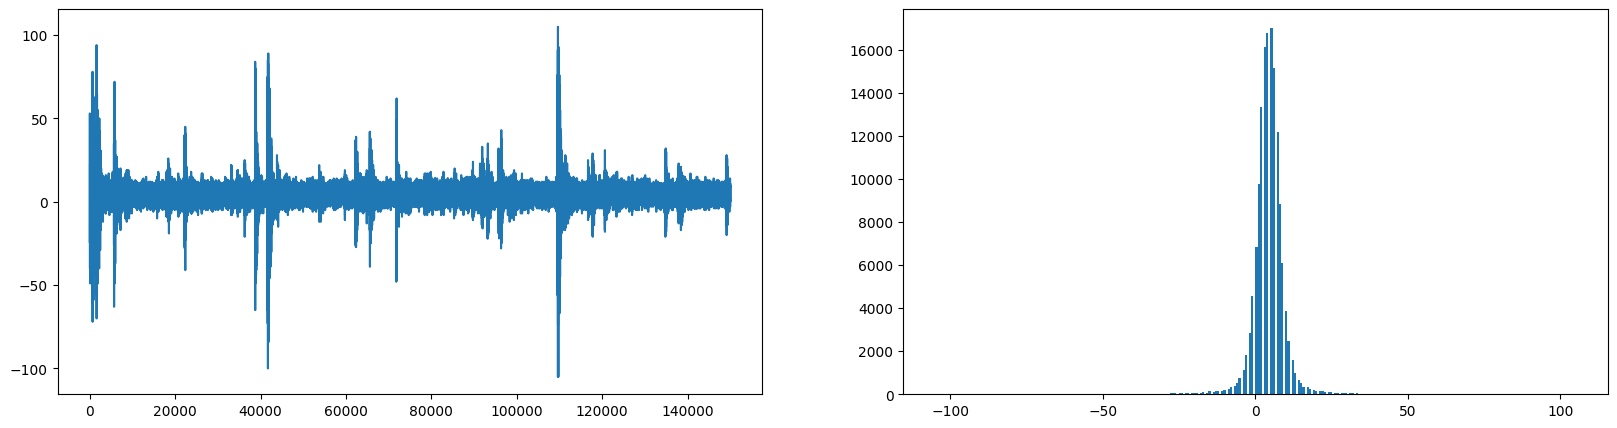

In [16]:
def get_Acoustic1():
	'''
	Source:
		https://www.kaggle.com/competitions/LANL-Earthquake-Prediction/overview
	'''
	return pd.read_csv(r'seg_1b1ad8.csv')["acoustic_data"].values

ac1 = get_Acoustic1()
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(ac1)
plt.subplot(1,2,2)
plt.hist(ac1,bins=300)
plt.show()

In [17]:
lanl1 = chi.chiSpace(ac1)

In [18]:
lanl1

{'GQQ': np.float64(0.277663944204796), 'LDA': np.float64(0.7616782163821074)}

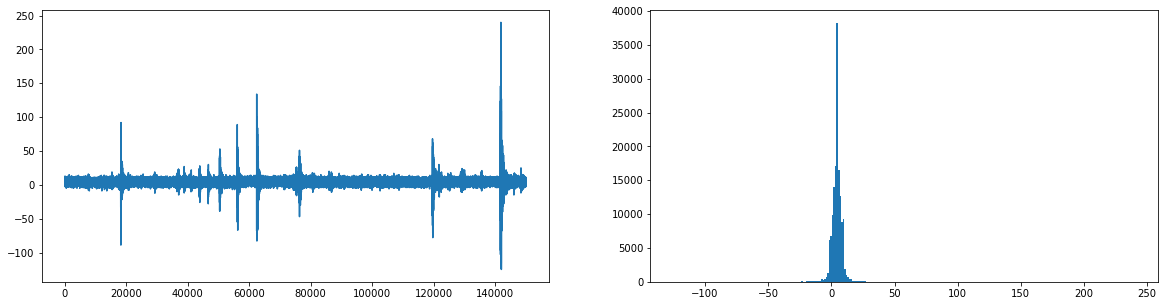

In [14]:

def get_Acoustic2():
	'''
	Source:
		https://www.kaggle.com/competitions/LANL-Earthquake-Prediction/overview
	'''
	return pd.read_csv(r'seg_1bd38e.csv')["acoustic_data"].values

ac2 = get_Acoustic2()
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(ac2)
plt.subplot(1,2,2)
plt.hist(ac2,bins=300)
plt.show()

In [15]:
lanl2 = chi.chiSpace(ac2)

## Full time-series plot

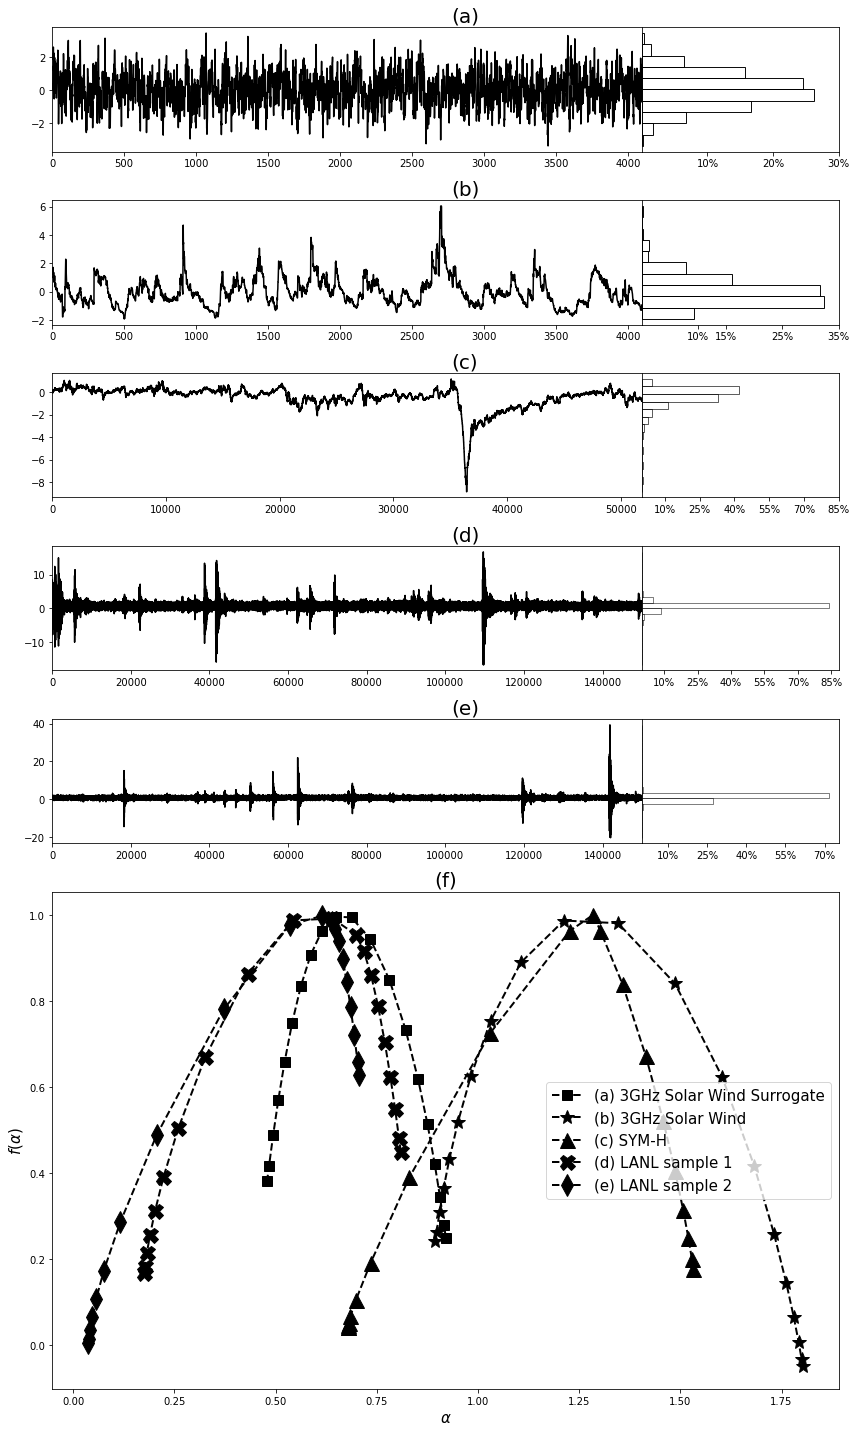

In [18]:
gs = GridSpec(6,2,height_ratios=[1,1,1,1,1,4],wspace=0.0,width_ratios=[3,1])

plt.figure(figsize=(12,20))

################################################################################
plt.subplot(gs[0,0])
plt.title("(a)",fontsize=20,x=0.7)
plt.plot(sw4096_s/np.std(sw4096_s),color='k')
plt.xlim(0,len(sw4096_s))
#plt.xlabel("Time")

plt.subplot(gs[0,1])
ds = pd.DataFrame({'y':sw4096_s/np.std(sw4096_s)})
sns.histplot(ds,y='y',color='k',bins=10,stat="probability",fill=False)
plt.ylabel('')
plt.yticks([])
plt.xlabel('')
plt.xticks([0.1,0.20,0.30],["10%","20%","30%"])

################################################################################
plt.subplot(gs[1,0])
plt.title("(b)",fontsize=20,x=0.7)
plt.plot(sw4096/np.std(sw4096),color='k')
plt.xlim(0,len(sw4096))
#plt.xlabel("Time")

plt.subplot(gs[1,1])
ds = pd.DataFrame({'y':sw4096/np.std(sw4096)})
sns.histplot(ds,y='y',color='k',bins=10,stat="probability",fill=False)
plt.ylabel('')
plt.yticks([])
plt.xlabel('')
plt.xticks([0.1,0.15,0.25,0.35],["10%","15%","25%","35%"])
################################################################################
plt.subplot(gs[2,0])
plt.title("(c)",fontsize=20,x=0.7)
plt.plot(symh/np.std(symh),color='k')
plt.xlim(0,len(symh))
#plt.xlabel("Time")

plt.subplot(gs[2,1])
ds = pd.DataFrame({'y':symh/np.std(symh)})
sns.histplot(ds,y='y',color='k',bins=15,stat="probability",fill=False)
plt.ylabel('')
plt.yticks([])
plt.xlabel('')
plt.xticks([0.1,0.25,0.4,0.55,0.7,0.85],["10%","25%","40%","55%","70%","85%"])
################################################################################

plt.subplot(gs[3,0])
plt.title("(d)",fontsize=20,x=0.7)
plt.plot(ac1/np.std(ac1),color='k')
plt.xlim(0,len(ac2))
#plt.xlabel("Time")

plt.subplot(gs[3,1])
ds = pd.DataFrame({'y':ac1/np.std(ac1)})
sns.histplot(ds,y='y',color='k',bins=20,stat="probability",fill=False)
plt.ylabel('')
plt.yticks([])
plt.xlabel('')
plt.xticks([0.1,0.25,0.4,0.55,0.7,0.85],["10%","25%","40%","55%","70%","85%"])
################################################################################

plt.subplot(gs[4,0])
plt.title("(e)",fontsize=20,x=0.7)
plt.plot(ac2/np.std(ac2),color='k')
plt.xlim(0,len(ac2))
#plt.xlabel("Time")

plt.subplot(gs[4,1])
ds = pd.DataFrame({'y':ac2/np.std(ac2)})
sns.histplot(ds,y='y',color='k',bins=20,stat="probability",fill=False)
plt.ylabel('')
plt.yticks([])
plt.xlabel('')
plt.xticks([0.1,0.25,0.4,0.55,0.7],["10%","25%","40%","55%","70%"])
################################################################################

plt.subplot(gs[5,:])
plt.title("(f)",fontsize=20)

a, fa =chi.getAverageSing(sw4096_s/np.std(sw4096_s))
plt.plot(a,fa, lw=2, color='k',marker='s',markersize=10,ls='--',label="(a) 3GHz Solar Wind Surrogate")
plt.xlabel(r"$\alpha$",fontsize=15)
plt.ylabel(r"$f(\alpha)$",fontsize=15)

xa, xfa =chi.getAverageSing(sw4096/np.std(sw4096))
plt.plot(xa,xfa, lw=2, color='k',marker='*',markersize=15,ls='--',label="(b) 3GHz Solar Wind")

xa, xfa =chi.getAverageSing(symh/np.std(symh))
plt.plot(xa,xfa, lw=2, color='k',marker='^',markersize=15,ls='--',label="(c) SYM-H")

xa, xfa =chi.getAverageSing(ac1/np.std(ac1))
plt.plot(xa,xfa, lw=2, color='k',marker='X',markersize=15,ls='--',label="(d) LANL sample 1")

xa, xfa =chi.getAverageSing(ac2/np.std(ac2))
plt.plot(xa,xfa, lw=2, color='k',marker='d',markersize=15,ls='--',label="(e) LANL sample 2")

leg = plt.legend(fontsize = 15)
for l in leg.legendHandles:
  l._sizes = [10]
plt.tight_layout()
plt.savefig("timeseries.png",dpi=200,bbox_inches='tight')
plt.show()

# $χ$-Space plot

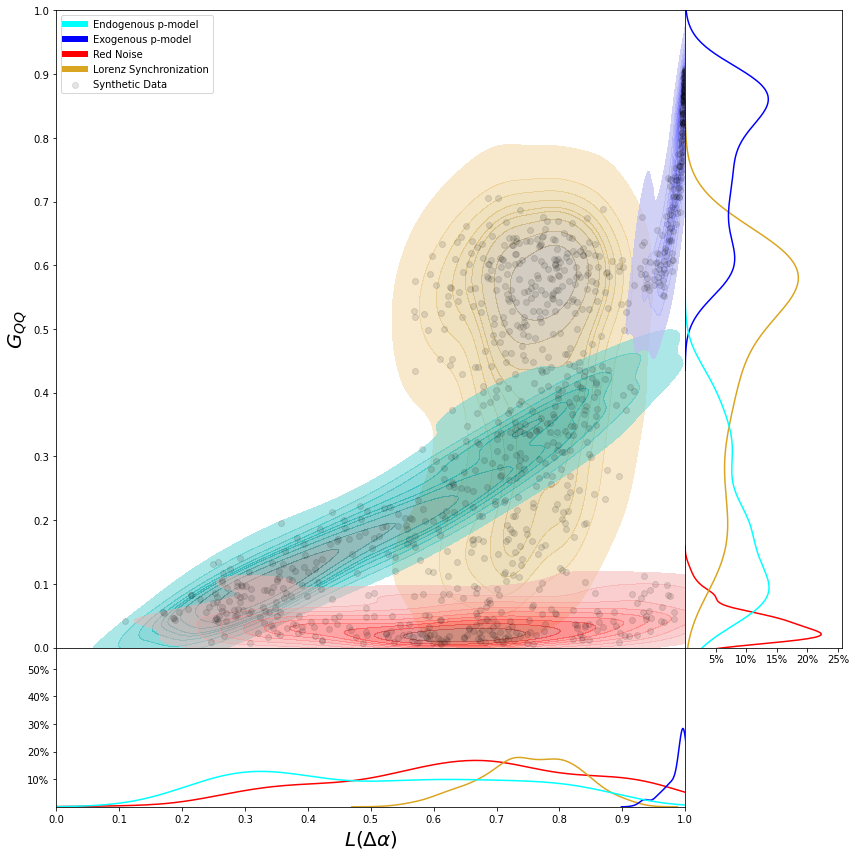

In [22]:
gs,[h,l] = chi.plot()

#https://matplotlib.org/stable/api/markers_api.html
ax = plt.subplot(gs[0,0])

fdata = pd.concat([chi.get_endoDataResults(),chi.get_exoDataResults(),chi.get_LorenzDataResults(), chi.get_redsDataResults()])
sc = plt.scatter(fdata['LDA'],fdata['GQQ'],color='k',alpha=0.1)
h.append(sc)
l.append("Synthetic Data")

'''

h2 = plt.scatter(swc_s["LDA"],swc_s["GQQ"],s=120,color='k',marker='s')
h.append(h2)
l.append("Solar Wind Surrogate")

h1 = plt.scatter(swc["LDA"],swc["GQQ"],s=120,color='k',marker='*')
h.append(h1)
l.append("Solar Wind")



h1 = plt.scatter(wiki_chi["LDA"],wiki_chi["GQQ"],s=120,color='k',marker='^')
h.append(h1)
l.append("Wikipedia page acess")


h3 = plt.scatter(lanl1["LDA"],lanl1["GQQ"],s=120,color='k',marker="X")
h.append(h3)
l.append("LANL Sample 1")

h3 = plt.scatter(lanl2["LDA"],lanl2["GQQ"],s=120,color='k',marker='d')
h.append(h3)
l.append("LANL Sample 2")
'''

plt.legend(h,l,loc=2)
plt.savefig("chiSpace.png",dpi=300)
plt.show()

In [22]:
def plot2(figsize=(12,12)):
	'''
	========================================================================
	Plots the Chi-Space using matplotlib and seaborn
	========================================================================
	figsize - size of of the figure frame
	========================================================================
	Wrote by: Rubens A. Sautter (12/2022)
	'''
	# Loading data	
	endo = chi.get_endoDataResults()
	exo = chi.get_exoDataResults()
	reds = chi.get_redsDataResults()
	zL = chi.get_LorenzDataResults()
	
	# Plotting
	
	gs = GridSpec(1, 1,wspace=0,hspace=0)

	plt.figure(figsize=figsize)

	plt.subplot(gs[0,0])
	sns.kdeplot(data=zL, x="LDA", y="GQQ",fill=True,color='goldenrod',thresh=0.02,alpha = 0.3)
	#plt.scatter(zL["LDA"],zL["GQQ"])
	sns.kdeplot(data=endo, x="LDA", y="GQQ",fill=True,color='cyan',thresh=0.05,alpha = 0.5)
	sns.kdeplot(data=exo, x="LDA", y="GQQ",fill=True,color='blue',thresh=0.005,alpha = 0.7)
	sns.kdeplot(data=reds, x="LDA", y="GQQ",fill=True,color='red',thresh=0.05,alpha = 0.5)

	#wn = plt.scatter(0.0,0.0,s=200,color='k')

	plt.xlim(0.0,1.0)
	plt.ylim(0.0,1.0)
	handles = [Line2D([0], [0], color='cyan', lw=6),
		             Line2D([0], [0], color='blue', lw=6),
		             Line2D([0], [0], color='red', lw=6),
		             Line2D([0], [0], color='goldenrod', lw=6)
		             ]
	labels = ['Endogenous p-model','Exogenous p-model','Red Noise','Lorenz Synchronization']
	plt.legend(handles,labels,loc=2)
	plt.xlabel('')
	plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
	plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
	plt.ylabel(r"$G_{QQ}$",fontsize=20)
	plt.xlabel(r"$L(\Delta\alpha)$",fontsize=20)
	
	return gs, [handles,labels]

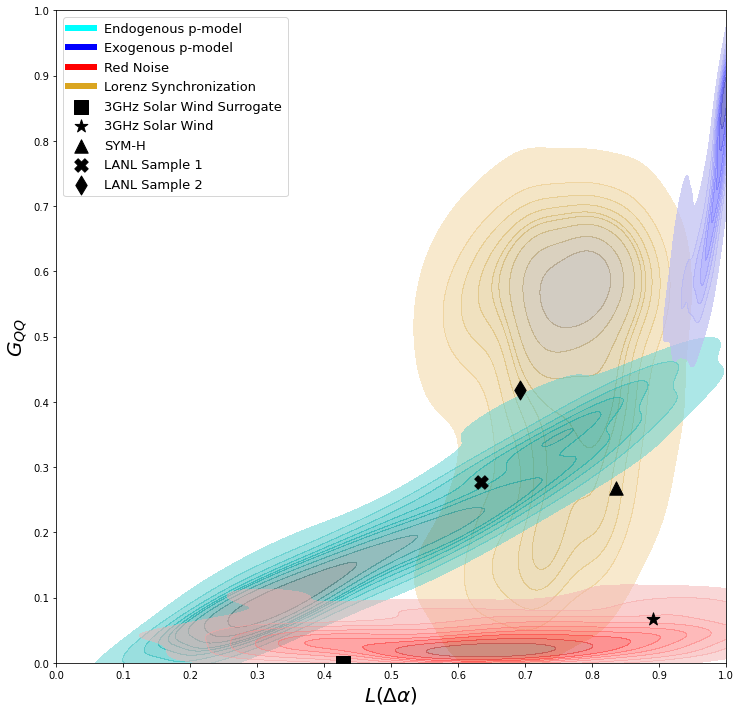

In [30]:
gs, [h,l] = plot2()

h2 = plt.scatter(swc_s["LDA"],swc_s["GQQ"],s=180,color='k',marker='s')
h.append(h2)
l.append("3GHz Solar Wind Surrogate")

h1 = plt.scatter(swc["LDA"],swc["GQQ"],s=180,color='k',marker='*')
h.append(h1)
l.append("3GHz Solar Wind")

h1 = plt.scatter(symh_chi["LDA"],symh_chi["GQQ"],s=180,color='k',marker='^')
h.append(h1)
l.append("SYM-H")


h3 = plt.scatter(lanl1["LDA"],lanl1["GQQ"],s=180,color='k',marker="X")
h.append(h3)
l.append("LANL Sample 1")

h3 = plt.scatter(lanl2["LDA"],lanl2["GQQ"],s=180,color='k',marker='d')
h.append(h3)
l.append("LANL Sample 2")

plt.legend(h,l,loc=2,fontsize=13)
plt.savefig("chiSpaceDatasets.png",dpi=300,bbox_inches='tight')
plt.show()